In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
from GraphLaplacian.helper import plot
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_moons, make_circles, make_classification
import scipy
import pdb
from datetime import datetime

sns.set()

In [20]:
colors = ["#63005c", "#ff6361", "#003f5c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))

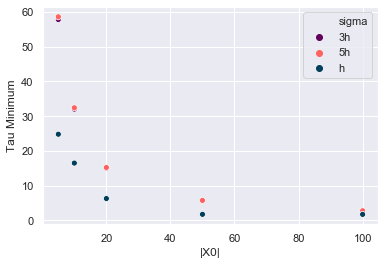

In [21]:
df5 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma5.csv", encoding="utf-8").assign(sigma="5h")
df3 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma3.csv", encoding="utf-8").assign(sigma="3h")
df1 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma1.csv", encoding="utf-8").assign(sigma="h")
# df05 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma0.5.csv", encoding="utf-8").assign(sigma="0.5h")
df = pd.concat([df3, df5, df1])
sns.scatterplot(data=df, x="|X0|", y="Tau Minimum", hue="sigma")

In [22]:
df5 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma5.csv", encoding="utf-8")
df5.rename(columns={"Tau Minimum":"Tau, sigma=5h"}, inplace=True)
df3 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma3.csv", encoding="utf-8")
df3.rename(columns={"Tau Minimum":"Tau, sigma=3h"}, inplace=True)
df1 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma1.csv", encoding="utf-8")
df1.rename(columns={"Tau Minimum":"Tau, sigma=h"}, inplace=True)
df05 = pd.read_csv("output/correlation/[2D]N0 vs Tau_Sigma0.5.csv", encoding="utf-8")
df05.rename(columns={"Tau Minimum":"Tau, sigma=0.5h"}, inplace=True)

df = pd.merge(df1, df3, on="|X0|")
df = pd.merge(df, df5, on="|X0|")
df

,|X0|,"Tau, sigma=h","Tau, sigma=3h","Tau, sigma=5h"
0,5,24.812207,57.816719,58.597891
1,10,16.512256,32.038047,32.428633
2,20,6.308198,15.047559,15.242852
3,50,1.767637,5.673496,5.771143
4,100,1.755431,2.744102,2.792925


### Data

Interation 0 error 0.75
Interation 1 error 0.42857142857142855
Interation 2 error 0.36363636363636365
Interation 3 error 0.26666666666666666
Interation 4 error 0.21052631578947367
Interation 5 error 0.17391304347826086
Interation 6 error 0.14814814814814814
Interation 7 error 0.12903225806451613
Interation 8 error 0.11428571428571428
Interation 9 error 0.125
Interation 10 error 0.1111111111111111
Interation 11 error 0.1
Interation 12 error 0.10714285714285714
Interation 13 error 0.0967741935483871
Interation 14 error 0.10144927536231885
Interation 15 error 0.1038961038961039
Interation 16 error 0.11494252873563218
Interation 17 error 0.12121212121212122
Interation 18 error 0.14655172413793102
Interation 19 error 0.19444444444444445
Interation 20 error 0.28
Interation 21 error 0.0


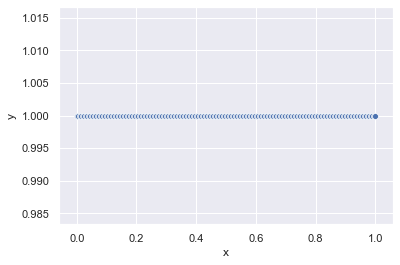

In [110]:
s = 0.05
dT = 
fig = plt.figure()
MBO = MBOBinary(X0, Y0, X1, cov=s, dT=dT, Nd=1)
MBO.solve()
data = list(zip(X, MBO.Y))
df = pd.DataFrame(data, columns=["x", "y"])
sns.scatterplot(data=df, x="x", y="y")

## $\sigma$ vs $\tau$

In [272]:
X = np.linspace(0, 1, 200)
Y = np.ones(len(X))

X1 = list(X[1:])
X0 = list(X[:1])
Y0 = list(Y[:1])

In [273]:
X[1]-X[0]

0.005025125628140704

In [155]:
def find_optimum_for_dt(min_dt, max_dt, s):
    MBO = MBOBinary(X0, Y0, X1, cov=s, dT=min_dt, Nd=1)
    MBO.solve()
    min_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    MBO = MBOBinary(X0, Y0, X1, cov=s, dT=max_dt, Nd=1)
    MBO.solve()
    max_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    if min_pen == max_pen:
        raise(Exception("min = max =", max_pen))
    while 2*(max_dt - min_dt) / (min_dt + max_dt) > 0.001:
        print("Bisection Error : ", 2*(max_dt - min_dt) / (min_dt + max_dt))
        mid_dt = (max_dt + min_dt) / 2
        MBO = MBOBinary(X0, Y0, X1, cov=s, dT=mid_dt, Nd=1)
        MBO.solve()
        mid_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
        if mid_pen<1:
            min_dt = mid_dt
        else:
            max_dt = mid_dt
    print("***Optimum dt", max_dt)
    return max_dt
    

In [156]:
ss = np.linspace(0.1, 2, 30)
opt_dt = list()
for s in ss:
    print("======================")
    print("sd : ", s)
    print("======================")
    max_dt = 10
    opt_dt.append(find_optimum_for_dt(0.05, max_dt, s))

sd :  0.1
Interation 0 error 0.0
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9800995024875618
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9605911330049262
Interation 0 error 0.993103448275862
Interation 1 error 0.275
Interation 2 error 0.0
Bisection Error :  1.9227053140096622
Interation 0 error 0.0
Bisection Error :  0.6492659053833606
Interation 0 error 0.967741935483871
Interation 1 error 0.7669172932330827
Interation 2 error 0.335
Interation 3 error 0.0
Bisection Error :  0.38753651411879264
Interation 0 error 0.0
Bisection Error :  0.17665335108743904
Interation 0 error 0.9230769230769231
Interation 1 error 0.7045454545454546
Interation 2 error 0.7441860465116279
Interation 3 error 0.14
Interation 4 error 0.0
Bisection Error :  0.09240770838170424
Interation 0 error 0.6666666666666666
Interation 1 error 0.6666666666666666
Interation 2 error 0.625
Interation 3 error 0.625
Interation 4 error 0.68
Interation 5 error 0.0
Bisection Erro

Interation 0 error 0.9615384615384616
Interation 1 error 0.87
Interation 2 error 0.0
Bisection Error :  0.01931007714327299
Interation 0 error 0.0
Bisection Error :  0.009608652615822935
Interation 0 error 0.0
Bisection Error :  0.004792813188665752
Interation 0 error 0.8888888888888888
Interation 1 error 0.955
Interation 2 error 0.0
Bisection Error :  0.002399281421242639
Interation 0 error 0.0
Bisection Error :  0.001198921573057269
Interation 0 error 0.75
Interation 1 error 0.98
Interation 2 error 0.0
***Optimum dt 2.026153564453125
sd :  0.49310344827586206
Interation 0 error 0.0
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9800995024875618
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9605911330049262
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9227053140096622
Interation 0 error 0.0
Bisection Error :  0.6492659053833606
Interation 0 error 0.0
Bisection Error :  0.27929824561403516
Interation 0 error 0.995
Int

Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9605911330049262
Interation 0 error 0.0
Bisection Error :  0.6578512396694216
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.3936696340257171
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.21832144816236962
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.11546272120684654
Interation 0 error 0.0
Bisection Error :  0.05611165938248971
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.028454993922928395
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.014329432943294392
Interation 0 error 0.9946236559139785
Interation 1 error 0.07
Interation 2 error 0.0
Bisection Error :  0.007190475330165702
Interation 0 error 0.9895833333333334
Interation 1 error 0.52
Interation 2 error 0.0
Bisection Error :  0.003601712170710231
Interation 0 error 0.9473684210526315
Interation 1 error 0.905
Interation 2 error 0.0
Bisection Error :  

Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.3936696340257171
Interation 0 error 0.0
Bisection Error :  0.17919855920756422
Interation 0 error 0.0
Bisection Error :  0.08575737987502695
Interation 0 error 0.0
Bisection Error :  0.04197869423056635
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.021211959707935806
Interation 0 error 0.0
Bisection Error :  0.010550033134526104
Interation 0 error 0.9821428571428571
Interation 1 error 0.72
Interation 2 error 0.0
Bisection Error :  0.005288966259584494
Interation 0 error 0.0
Bisection Error :  0.00264099110158521
Interation 0 error 0.0
Bisection Error :  0.0013196242718027883
Interation 0 error 0.0
***Optimum dt 3.68408203125
sd :  1.410344827586207
Interation 0 error 0.0
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9800995024875618
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9605911330049262
Interation 0 error 0.0
Bisection Error :  0.657851239669

Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  0.016355044175056576
Interation 0 error 0.9722222222222222
Interation 1 error 0.82
Interation 2 error 0.0
Bisection Error :  0.008211095294093413
Interation 0 error 0.0
Bisection Error :  0.00409713715115153
Interation 0 error 0.0
Bisection Error :  0.0020464724060447683
Interation 0 error 0.0
Bisection Error :  0.0010227129645569732
Interation 0 error 0.0
***Optimum dt 4.752929687500001
sd :  1.8689655172413793
Interation 0 error 0.0
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9800995024875618
Interation 0 error 0.995
Interation 1 error 0.0
Bisection Error :  1.9605911330049262
Interation 0 error 0.0
Bisection Error :  0.6578512396694216
Interation 0 error 0.0
Bisection Error :  0.2824698367636622
Interation 0 error 0.0
Bisection Error :  0.13191912495856814
Interation 0 error 0.0
Bisection Error :  0.06385368201508095
Interation 0 error 0.0
Bisection Error :  0.03142518752467426
Interation 0 e

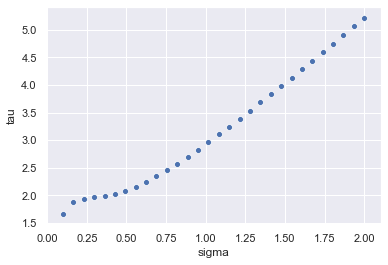

In [278]:
df = pd.read_csv("output/correlation/[linspace_0_1_200]sigma_vs_tau.csv", encoding="utf-8")
df.columns = ["sigma", "tau"]
sns.scatterplot(data=df, x="sigma", y="tau")

/Users/imam.ar/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 120590 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imam.ar/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 120590 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/imam.ar/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 120591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imam.ar/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 120591 missing from current font.
  font.load_char(ord(s), flags=flags)


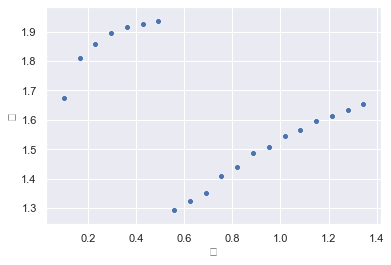

In [276]:
ss = ss[:len(opt_dt)]
data = list(zip(ss, opt_dt))
df = pd.DataFrame(data, columns=["𝜎", "𝜏"])
sns.scatterplot(data=df, x="𝜎", y="𝜏")

In [158]:
ss / np.array(opt_dt)

array([0.06000125, 0.08825029, 0.11916965, 0.1507912 , 0.1818592 ,
       0.21103346, 0.23711503, 0.25952519, 0.27864257, 0.29463191,
       0.30792219, 0.31914713, 0.32848913, 0.33641669, 0.34307858,
       0.34888269, 0.35392582, 0.35803533, 0.36180605, 0.36503736,
       0.36778565, 0.37032621, 0.37268175, 0.37465943, 0.37629506,
       0.37801975, 0.37943929, 0.38039239, 0.38165072, 0.38283415])

In [211]:
0.16551724/0.08825029

1.8755432984979428

In [159]:
df.to_csv("output/correlation/[linspace_0_1_200]sigma_vs_tau.csv", index=False, encoding="utf-8")

## $\tau$ vs $h$

In [245]:
def find_optimum_for_dt(min_dt, max_dt, X):
    Y = np.ones(len(X))
    X1 = list(X[1:])
    X0 = list(X[:1])
    Y0 = list(Y[:1])
    s = 0.2
    MBO = MBOBinary(X0, Y0, X1, cov=s, dT=min_dt, Nd=1)
    MBO.solve()
    min_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    MBO = MBOBinary(X0, Y0, X1, cov=s, dT=max_dt, Nd=1)
    MBO.solve()
    max_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    if min_pen == max_pen:
        raise(Exception("min = max =", max_pen))
    while 2*(max_dt - min_dt) / (min_dt + max_dt) > 0.01:
        print("Bisection Error : ", 2*(max_dt - min_dt) / (min_dt + max_dt))
        mid_dt = (max_dt + min_dt) / 2
        MBO = MBOBinary(X0, Y0, X1, cov=s, dT=mid_dt, Nd=1)
        MBO.solve()
        mid_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
        if mid_pen<1:
            min_dt = mid_dt
        else:
            max_dt = mid_dt
    print("***Optimum dt", max_dt)
    return max_dt

In [251]:
# opt_dt = list()
_var =  np.linspace(10, 45, 15)
# var = list()
for v in _var:
    if v not in (10, 45):
        X = np.linspace(0, 1, v)
        h = X[2] - X[1]
        print("======================")
        print("h :", h, "| v :", v)
        print("======================")
        max_dt = 10
        opt_dt.append(find_optimum_for_dt(0.05, max_dt, X))
        var.append(h)

h : 0.09090909090909091 | v : 12.5
Interation 0 error 0.0
Interation 0 error 0.9166666666666666
Interation 1 error 0.0
Bisection Error :  1.9800995024875618
Interation 0 error 0.9166666666666666
Interation 1 error 0.0
Bisection Error :  1.9605911330049262
Interation 0 error 0.75
Interation 1 error 0.42857142857142855
Interation 2 error 0.4166666666666667
Interation 3 error 0.0
Bisection Error :  1.9227053140096622
Interation 0 error 0.5
Interation 1 error 0.3333333333333333
Interation 2 error 0.25
Interation 3 error 0.2
Interation 4 error 0.16666666666666666
Interation 5 error 0.14285714285714285
Interation 6 error 0.2222222222222222
Interation 7 error 0.25
Interation 8 error 0.0
Bisection Error :  1.8511627906976742
Interation 0 error 0.0
Bisection Error :  0.6327503974562798
Interation 0 error 0.0
Bisection Error :  0.2731640356897735
Interation 0 error 0.0
Bisection Error :  0.12785094763893357
Interation 0 error 0.0
Bisection Error :  0.0619455252918289
Interation 0 error 0.0
Bisec

Interation 3 error 0.2857142857142857
Interation 4 error 0.3
Interation 5 error 0.4117647058823529
Interation 6 error 0.22727272727272727
Interation 7 error 0.0
***Optimum dt 1.439501953125
h : 0.041666666666666664 | v : 25.0
Interation 0 error 0.0
Interation 0 error 0.96
Interation 1 error 0.0
Bisection Error :  1.9800995024875618
Interation 0 error 0.96
Interation 1 error 0.0
Bisection Error :  1.9605911330049262
Interation 0 error 0.9090909090909091
Interation 1 error 0.56
Interation 2 error 0.0
Bisection Error :  1.9227053140096622
Interation 0 error 0.0
Bisection Error :  0.6492659053833606
Interation 0 error 0.8
Interation 1 error 0.5833333333333334
Interation 2 error 0.52
Interation 3 error 0.0
Bisection Error :  0.38753651411879264
Interation 0 error 0.6666666666666666
Interation 1 error 0.5
Interation 2 error 0.45454545454545453
Interation 3 error 0.5416666666666666
Interation 4 error 0.04
Interation 5 error 0.0
Bisection Error :  0.21455525606468995
Interation 0 error 0.0
Bis

Interation 4 error 0.43243243243243246
Interation 5 error 0.0
Bisection Error :  0.02393121279538209
Interation 0 error 0.5
Interation 1 error 0.5
Interation 2 error 0.5
Interation 3 error 0.5294117647058824
Interation 4 error 0.5405405405405406
Interation 5 error 0.0
Bisection Error :  0.012037625139884519
Interation 0 error 0.5
Interation 1 error 0.5
Interation 2 error 0.5
Interation 3 error 0.5294117647058824
Interation 4 error 0.5405405405405406
Interation 5 error 0.0
***Optimum dt 1.6144042968749999
h : 0.02564102564102564 | v : 40.0
Interation 0 error 0.0
Interation 0 error 0.975
Interation 1 error 0.0
Bisection Error :  1.9800995024875618
Interation 0 error 0.975
Interation 1 error 0.0
Bisection Error :  1.9605911330049262
Interation 0 error 0.9583333333333334
Interation 1 error 0.4
Interation 2 error 0.0
Bisection Error :  1.9227053140096622
Interation 0 error 0.0
Bisection Error :  0.6492659053833606
Interation 0 error 0.875
Interation 1 error 0.7037037037037037
Interation 2 e

In [265]:
max(opt_dt)

1.93505859375

In [266]:
opt_dt = np.array(opt_dt)[np.array(var) < max(var)]
var = np.array(var)[np.array(var) < max(var)]

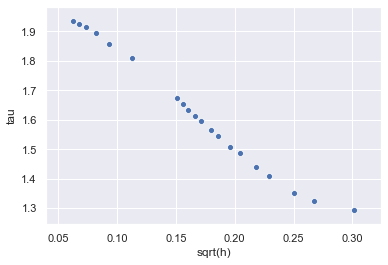

In [267]:
data = list(zip(np.sqrt(var), opt_dt))
df = pd.DataFrame(data, columns=["sqrt(h)", "tau"])
sns.scatterplot(data=df, x="sqrt(h)", y="tau")

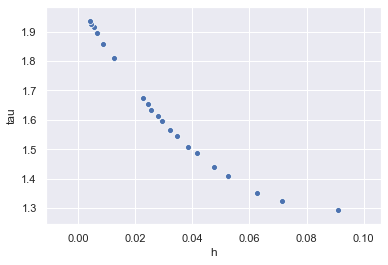

In [268]:
data = list(zip(var, opt_dt))
df = pd.DataFrame(data, columns=["h", "tau"])
sns.scatterplot(data=df, x="h", y="tau")

In [270]:
np.sqrt(h) / np.array(opt_dt)

array([0.09336599, 0.08634394, 0.08408535, 0.08236181, 0.08152627,
       0.08111482, 0.08070751, 0.12071402, 0.11805406, 0.1155088 ,
       0.11073392, 0.10849152, 0.10494942, 0.10359651, 0.10099269,
       0.09973926, 0.09791638, 0.0967377 , 0.09558706, 0.09446347])

In [271]:
df.to_csv("output/correlation/[sigma=0.2]h_vs_tau.csv", index=False, encoding="utf-8")

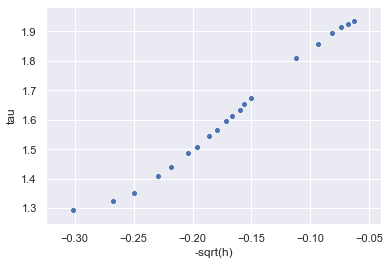

In [320]:
df = pd.read_csv("output/correlation/[sigma=0.2]h_vs_tau.csv")
df.loc[:, "-sqrt(h)"] = df.h.apply(lambda x: -np.sqrt((x)))
df.loc[:, "tau"] = df.tau.apply(lambda x: x)
sns.scatterplot(data=df, x="-sqrt(h)", y="tau")

In [286]:
df["h"] / df["tau"]

0     0.121058
1     0.077250
2     0.056198
3     0.044701
4     0.036909
5     0.031313
6     0.027262
7     0.331494
8     0.268164
9     0.241584
10    0.215652
11    0.200885
12    0.184525
13    0.173674
14    0.161879
15    0.154406
16    0.144947
17    0.139580
18    0.131372
19    0.127416
dtype: float64

## $\sigma$ vs $h$

In [331]:
def find_optimum_for_s(min_s, max_s, X):
    Y = np.ones(len(X))
    X1 = list(X[1:])
    X0 = list(X[:1])
    Y0 = list(Y[:1])
    dT = 2.5
    MBO = MBOBinary(X0, Y0, X1, cov=min_s, dT=dT, Nd=1)
    MBO.solve()
    min_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    MBO = MBOBinary(X0, Y0, X1, cov=max_s, dT=dT, Nd=1)
    MBO.solve()
    max_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
    if min_pen == max_pen:
        raise(Exception("min = max =", max_pen))
    while 2*(max_s - min_s) / (min_s + max_s) > 0.01:
        print("Bisection Error : ", 2*(max_s - min_s) / (min_s + max_s))
        mid_s = (max_s + min_s) / 2.0
        MBO = MBOBinary(X0, Y0, X1, cov=mid_s, dT=dT, Nd=1)
        MBO.solve()
        mid_pen = sum(MBO.Y)*1.0 / len(MBO.Y)
        if mid_pen<1:
            min_s = mid_s
        else:
            max_s = mid_s
    print("***Optimum sd", mid_s)
    return mid_s

In [324]:
max(var)

0.09090909090909091

In [332]:
opt_s = list()
_var =  np.linspace(10, 500, 10)
var = list()
for v in _var:
    X = np.linspace(0, 1, v)
    h = X[2] - X[1]
    print("======================")
    print("h :", h, "| v :", v)
    print("======================")
    max_s = 2
    min_s = max(h,0.01)
    opt_s.append(find_optimum_for_s(min_s, max_s, X))
    var.append(h)

h : 0.1111111111111111 | v : 10.0
Interation 0 error 0.5
Interation 1 error 0.3333333333333333
Interation 2 error 0.25
Interation 3 error 0.0
Interation 0 error 0.0
Bisection Error :  1.7894736842105263
Interation 0 error 0.0
Bisection Error :  0.6181818181818182
Interation 0 error 0.0
Bisection Error :  0.26771653543307095
Interation 0 error 0.0
Bisection Error :  0.12546125461254615
Interation 0 error 0.0
Bisection Error :  0.06082289803220037
Interation 0 error 0.0
Bisection Error :  0.029955947136563826
Interation 0 error 0.0
Bisection Error :  0.014866637516397002
Interation 0 error 0.0
***Optimum sd 1.9852430555555556
h : 0.015873015873015872 | v : 64.44444444444444
Interation 0 error 0.8333333333333334
Interation 1 error 0.25
Interation 2 error 0.1111111111111111
Interation 3 error 0.1
Interation 4 error 0.09090909090909091
Interation 5 error 0.08333333333333333
Interation 6 error 0.07692307692307693
Interation 7 error 0.0
Interation 0 error 0.0
Bisection Error :  1.968503937007

KeyboardInterrupt: 

In [238]:
# opt_s = np.array(opt_s)[np.array(var)!=max(var)]
# var = np.array(var)[np.array(var)!=max(var)]

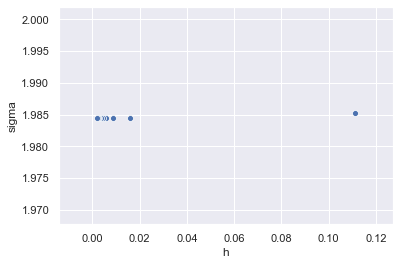

In [326]:
data = list(zip(var, opt_s))
df = pd.DataFrame(data, columns=["h", "sigma"])
sns.scatterplot(data=df, x="h", y="sigma")

In [243]:
np.array(var) / opt_s

array([0.49655813, 0.40472834, 0.29320462, 0.22137275, 0.17781103,
       0.14857454, 0.12759482, 0.11180694, 0.09949586, 0.82797655,
       0.75356453, 0.69359072, 0.65238512, 0.61952658, 0.5932363 ,
       0.56300471, 0.54589678, 0.52581919])

In [244]:
df.to_csv("output/correlation/[tau=3]h_vs_sigma.csv", index=False, encoding="utf-8")

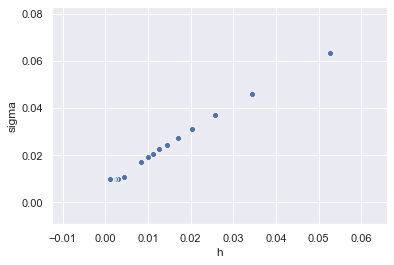

In [322]:
df = pd.read_csv("output/correlation/[tau=3]h_vs_sigma.csv")
# df.loc[:, "-sqrt(h)"] = df.h.apply(lambda x: -np.sqrt((x)))
df.loc[:, "sigma"] = df.sd.apply(lambda x: x)
sns.scatterplot(data=df, x="h", y="sigma")

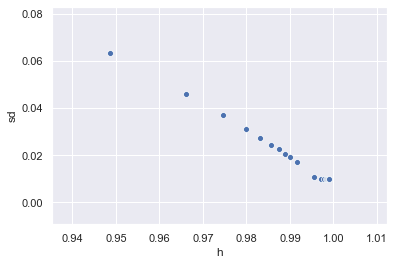

In [288]:
df = pd.read_csv("output/correlation/[tau=3]h_vs_sigma.csv")
df.loc[:, "h"] = df.h.apply(lambda x: np.exp(-(x)))
sns.scatterplot(data=df, x="h", y="sd")

Interation 0 error 0.9878048780487805
Interation 1 error 0.2545454545454545
Interation 2 error 0.14728682170542637
Interation 3 error 0.0979020979020979
Interation 4 error 0.07741935483870968
Interation 5 error 0.06060606060606061
Interation 6 error 0.05172413793103448
Interation 7 error 0.04395604395604396
Interation 8 error 0.037037037037037035
Interation 9 error 0.03076923076923077
Interation 10 error 0.029850746268656716
Interation 11 error 0.028985507246376812
Interation 12 error 0.02358490566037736
Interation 13 error 0.02304147465437788
Interation 14 error 0.02252252252252252
Interation 15 error 0.022026431718061675
Interation 16 error 0.021551724137931036
Interation 17 error 0.02109704641350211
Interation 18 error 0.016597510373443983
Interation 19 error 0.0163265306122449
Interation 20 error 0.01606425702811245
Interation 21 error 0.015810276679841896
Interation 22 error 0.01556420233463035
Interation 23 error 0.01532567049808429
Interation 24 error 0.018796992481203006
Intera

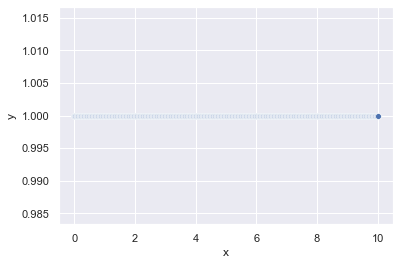

In [46]:
s = 0.05
dT = 100
fig = plt.figure()
MBO = MBOBinary(X0, Y0, X1, cov=s, dT=dT, Nd=1)
MBO.solve()
data = list(zip(X, MBO.Y))
df = pd.DataFrame(data, columns=["x", "y"])
sns.scatterplot(data=df, x="x", y="y")

Interation 0 error 0.9166666666666666
Interation 1 error 0.25
Interation 2 error 0.15789473684210525
Interation 3 error 0.09523809523809523
Interation 4 error 0.08695652173913043
Interation 5 error 0.041666666666666664
Interation 6 error 0.04
Interation 7 error 0.038461538461538464
Interation 8 error 0.037037037037037035
Interation 9 error 0.03571428571428571
Interation 10 error 0.034482758620689655
Interation 11 error 0.03333333333333333
Interation 12 error 0.03225806451612903
Interation 13 error 0.03125
Interation 14 error 0.030303030303030304
Interation 15 error 0.0


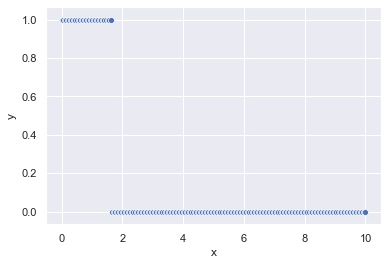

In [22]:
s = 0.1
dT = 10
fig = plt.figure()
MBO = MBOBinary(X0, Y0, X1, cov=s, dT=dT, Nd=1)
MBO.solve()
data = list(zip(X, MBO.Y))
df = pd.DataFrame(data, columns=["x", "y"])
sns.scatterplot(data=df, x="x", y="y")

## Effect of $\sigma$

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np

Interation 0 error 0.9824561403508771
Interation 1 error 0.25
Interation 2 error 0.14606741573033707
Interation 3 error 0.10101010101010101
Interation 4 error 0.07476635514018691
Interation 5 error 0.06140350877192982
Interation 6 error 0.05
Interation 7 error 0.04
Interation 8 error 0.038461538461538464
Interation 9 error 0.029850746268656716
Interation 10 error 0.028985507246376812
Interation 11 error 0.02127659574468085
Interation 12 error 0.020833333333333332
Interation 13 error 0.02040816326530612
Interation 14 error 0.02
Interation 15 error 0.0196078431372549
Interation 16 error 0.012903225806451613
Interation 17 error 0.012738853503184714
Interation 18 error 0.012578616352201259
Interation 19 error 0.012422360248447204
Interation 20 error 0.012269938650306749
Interation 21 error 0.012121212121212121
Interation 22 error 0.011976047904191617
Interation 23 error 0.011834319526627219
Interation 24 error 0.011695906432748537
Interation 25 error 0.011560693641618497
Interation 26 erro

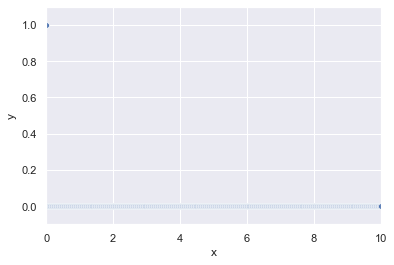

In [49]:
fig = plt.figure()
MBO = MBOBinary(X0, Y0, X1, cov=0.05, dT=50, Nd=1)
MBO.solve()
data = list(zip(X, MBO.Y))
def animate(i):
    plt.clf()
    data = list(zip(X, MBO.tracking[i].get("Y")))
    df = pd.DataFrame(data, columns=["x", "y"])
    g = sns.scatterplot(data=df, x="x", y="y")
    g.set(ylim=(-0.1, 1.1), xlim=(0, 10))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(MBO.tracking), interval=10, repeat=True)
ani.save('output/test.gif'.format(s), writer='imagemagick')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np

sigm = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for s in sigm:
    fig = plt.figure()
    MBO = MBOBinary(X0, Y0, X1, cov=s, dT=1)
    MBO.solve()
    data = list(zip(X, MBO.Y))
    def animate(i):
        plt.clf()
        data = list(zip(X, MBO.tracking[i].get("Y")))
        df = pd.DataFrame(data, columns=["x", "y"])
        g = sns.scatterplot(data=df, x="x", y="y")
        g.set(ylim=(-0.1, 1.1), xlim=(0, 10))

    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(MBO.tracking), interval=10, repeat=True)
    ani.save('output/sigma/00 test_sigm_{}.gif'.format(s), writer='imagemagick')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np

dT = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1]

for t in dT:
    fig = plt.figure()
    MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=t)
    MBO.solve()
    data = list(zip(X, MBO.Y))
    def animate(i):
        plt.clf()
        data = list(zip(X, MBO.tracking[i].get("Y")))
        df = pd.DataFrame(data, columns=["x", "y"])
        g = sns.scatterplot(data=df, x="x", y="y")
        g.set(ylim=(-0.1, 1.1), xlim=(0, 10))

    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(MBO.tracking), interval=10, repeat=True)
    ani.save('output/dT/00 test_dT_{}.gif'.format(t), writer='imagemagick')

## 2D

In [ ]:
import itertools

X = np.linspace(0, 10, 300)
Y = np.ones(len(X))

X1 = list(X[1:])
X0 = list(X[:1])
Y0 = list(Y[:1])

sigm = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
dT = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
combs = list(itertools.product(sigm, dT))
result = list()

for cs, ct in combs:
    MBO = MBOBinary(X0, Y0, X1, cov=cs, dT=ct)
    MBO.solve()
    result.append({
        "Penetration": np.array(MBO.Y) / len(MBO.Y),
        "sigma":cs, "dT":ct
    })

In [ ]:
df = pd.DataFrame(result)
df.Penetration = df.Penetration.apply(lambda x: round(sum(x), 2))

df = df.sort_values(["dT"], ascending=False).sort_values(["sigma"], ascending=True)
sns.heatmap(df.pivot("dT", "sigma", "Penetration"), cmap="YlGnBu", annot=True)

In [ ]:
X = np.linspace(0, 10, 200)
Y = np.ones(len(X))

X1 = list(X[1:])
X0 = list(X[:1])
Y0 = list(Y[:1])

sigm = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
dT = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
combs = list(itertools.product(sigm, dT))
result = list()

for cs, ct in combs:
    MBO = MBOBinary(X0, Y0, X1, cov=cs, dT=ct)
    MBO.solve()
    result.append({
        "Penetration": np.array(MBO.Y) / len(MBO.Y),
        "sigma":cs, "dT":ct
    })
    
df2 = pd.DataFrame(result)
df2.Penetration = df2.Penetration.apply(lambda x: round(sum(x), 2))

df2 = df2.sort_values(["dT"], ascending=False).sort_values(["sigma"], ascending=True)
sns.heatmap(df2.pivot("dT", "sigma", "Penetration"), cmap="YlGnBu", annot=True)

In [ ]:
X = np.linspace(0, 10, 100)
Y = np.ones(len(X))

X1 = list(X[1:])
X0 = list(X[:1])
Y0 = list(Y[:1])

sigm = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
dT = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
combs = list(itertools.product(sigm, dT))
result = list()

for cs, ct in combs:
    MBO = MBOBinary(X0, Y0, X1, cov=cs, dT=ct)
    MBO.solve()
    result.append({
        "Penetration": np.array(MBO.Y) / len(MBO.Y),
        "sigma":cs, "dT":ct
    })

In [ ]:
df3 = pd.DataFrame(result)
df3.Penetration = df3.Penetration.apply(lambda x: round(sum(x), 2))

df3 = df3.sort_values(["dT"], ascending=False).sort_values(["sigma"], ascending=True)
sns.heatmap(df3.pivot("dT", "sigma", "Penetration"), cmap="YlGnBu", annot=True)

In [ ]:
X = np.linspace(0, 10, 50)
Y = np.ones(len(X))

X1 = list(X[1:])
X0 = list(X[:1])
Y0 = list(Y[:1])

sigm = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
dT = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
combs = list(itertools.product(sigm, dT))
result = list()

for cs, ct in combs:
    MBO = MBOBinary(X0, Y0, X1, cov=cs, dT=ct)
    MBO.solve()
    result.append({
        "Penetration": np.array(MBO.Y) / len(MBO.Y),
        "sigma":cs, "dT":ct
    })

In [ ]:
df4 = pd.DataFrame(result)
df4.Penetration = df4.Penetration.apply(lambda x: round(sum(x), 2))

df4 = df4.sort_values(["dT"], ascending=False).sort_values(["sigma"], ascending=True)
sns.heatmap(df4.pivot("dT", "sigma", "Penetration"), cmap="YlGnBu", annot=True)

In [ ]:
df.to_csv("output/Penetration/1d_10_300.csv", encoding="utf-8", index=False)
df2.to_csv("output/Penetration/1d_10_200.csv", encoding="utf-8", index=False)
df3.to_csv("output/Penetration/1d_10_100.csv", encoding="utf-8", index=False)
df4.to_csv("output/Penetration/1d_10_50.csv", encoding="utf-8", index=False)

In [ ]:
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-0.2, 1.3))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = X
    y = MBO.tracking[i].get("Y")
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(X), interval=10, blit=True)


anim.save('output/test.gif', writer='imagemagick')

In [ ]:
for x in MBO.tracking:
    print(len(x.get("Y")))

In [ ]:
len(X)